<a href="https://colab.research.google.com/github/Asilbek-dev309/Deep-Machine-learning/blob/main/Deep_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 8.97 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9.1
    Uninstalling rsa-4.9.1:
      Successfully uninstalled rsa-4.9.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.


In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default) or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset fol

In [ ]:
# Avtomobil Samalyot suv transportlari

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 37553 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

##Model

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets
path=Path('train')
fls=get_image_files(path)
verify_images(fls)

(#0) []

In [ ]:
#data block
transport=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
#Dataloader
dls=transport.dataloaders(path)

#datasetni tekshiramiz
#dls.train.show_batch(max_n=32,nrows=4)


In [ ]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.501266,0.331407,0.853448,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.364693,0.305281,0.896552,00:15
1,0.279126,0.253221,0.905172,00:08
2,0.196655,0.264275,0.905172,00:07
3,0.159103,0.271303,0.905172,00:08


In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix

<bound method ClassificationInterpretation.plot_confusion_matrix of <fastai.interpret.ClassificationInterpretation object at 0x7eb41e27ba50>>

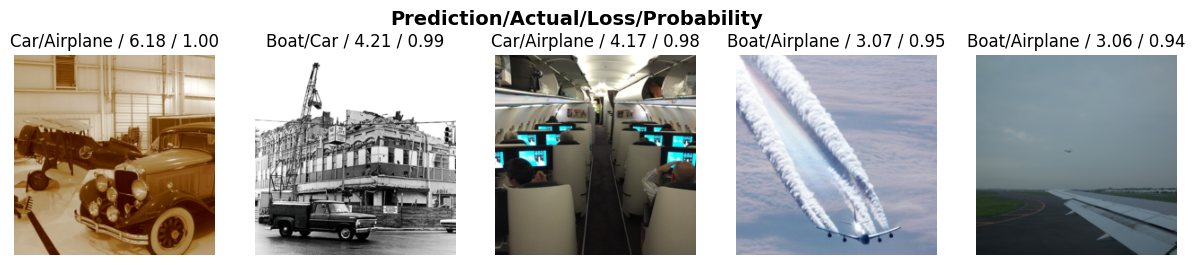

In [ ]:
interp.plot_top_losses(5,nrows=1)

##Modelni tekshirish

In [ ]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Boat
Ehtimollik:0.7040306925773621


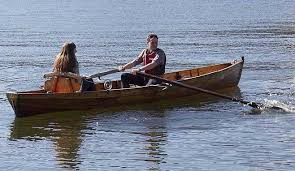

In [ ]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimollik:{probs[pred_id]}')
img

##O'qitilgan modellarimizni saqlash

In [ ]:
learn.export('transport_model.pkl')

Tekshirish

In [ ]:
model=load_learner('/content/transport_model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [ ]:
model.predict(img)

('Boat', tensor(1), tensor([2.9578e-01, 7.0403e-01, 1.8421e-04]))